In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
n_hidden = 35 # len(chars)
lr = 0.01
epochs = 1000

In [3]:

string = "hello pytorch. how long can a rnn cell remember? show me your limit!"
chars =  "abcdefghijklmnopqrstuvwxyz ?!.,:;01"

char_list = [i for i in chars]
n_letters = len(char_list)

In [4]:
def string_to_onehot(string):
    start = np.zeros(shape=n_letters ,dtype=int)
    end = np.zeros(shape=n_letters ,dtype=int)
    start[-2] = 1 # start tocken
    end[-1] = 1 # end tocken
    for i in string:
        idx = char_list.index(i)
        zero = np.zeros(shape=n_letters ,dtype=int)
        zero[idx]=1
        start = np.vstack([start,zero])
    output = np.vstack([start,end])
    return output

In [5]:
def onehot_to_word(onehot_1):
    onehot = torch.Tensor.numpy(onehot_1)
    return char_list[onehot.argmax()]

In [6]:
# RNN with 1 hidden layer

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size) # input->hidden
        self.i2o = nn.Linear(input_size + hidden_size, output_size) # input->output
        self.act_fn = nn.Tanh()
    
    def forward(self, input, hidden):
        # 입력과 hidden state를 cat함수로 붙여줍니다.
        combined = torch.cat((input, hidden), 1)# hidden state는 업데이트, 결과값은 계산해줍니다.
        hidden = self.act_fn(self.i2h(combined))
        output = self.i2o(combined)
        return output, hidden
     
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn = RNN(n_letters, n_hidden, n_letters)

In [7]:
loss_func = nn.MSELoss() # Mean Squraed Error
optimizer = torch.optim.Adam(rnn.parameters(),lr = lr)

In [8]:

one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())
loss_arr=[]
for i in range(epochs):
    optimizer.zero_grad()
    
    hidden = rnn.init_hidden()
    total_loss = 0
    for j in range(one_hot.size()[0]-1):

        input_ = one_hot[j:j+1,:] # 앞에 글자
        target = one_hot[j+1] # 뒤에 글자
        output, hidden = rnn.forward(input_, hidden)
        
        loss = loss_func(output.view(-1),target.view(-1))
        total_loss += loss
        loss_arr.append(total_loss)

    total_loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(total_loss)

tensor(2.5222, grad_fn=<AddBackward0>)
tensor(0.0608, grad_fn=<AddBackward0>)
tensor(0.0225, grad_fn=<AddBackward0>)
tensor(0.0140, grad_fn=<AddBackward0>)
tensor(0.0088, grad_fn=<AddBackward0>)
tensor(0.0064, grad_fn=<AddBackward0>)
tensor(0.0067, grad_fn=<AddBackward0>)
tensor(0.0035, grad_fn=<AddBackward0>)
tensor(0.0047, grad_fn=<AddBackward0>)
tensor(0.0022, grad_fn=<AddBackward0>)


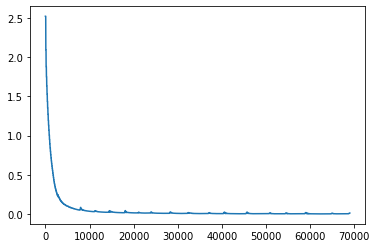

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_arr)

In [10]:

start = torch.zeros(1,n_letters)
start[:,-2] = 1

with torch.no_grad():
    hidden = rnn.init_hidden()

    input_ = start
    output_string = ""

    for i in range(len(string)):
        output, hidden = rnn.forward(input_, hidden)
        output_string += onehot_to_word(output.data)
        input_ = output

print(output_string)

hello pytorgor nr ca ronemne onong oahlr oa e y pry gyoc lono oggeml
